# Data Analysis and Classification

## Basic Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset

### Load `csv`

In [3]:
dataset = pd.read_csv("../data/homeLoanAproval.csv")

# Set the display format to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dataset

,Loan_ID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,PropertyArea,LoanStatus
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.00,360.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.00,360.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.00,360.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.00,360.00,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0,71.00,360.00,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0,40.00,180.00,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240,253.00,360.00,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0,187.00,360.00,Urban,Y


## Dataset Analysis

Here we will analyze the dataset to understand the data and its structure.


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   SelfEmployed       582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    object 
 8   LoanAmount         592 non-null    float64
 9   LoanAmountTerm     600 non-null    float64
 10  PropertyArea       614 non-null    object 
 11  LoanStatus         614 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 57.7+ KB


In this case the dataset does not contain any missing values, and has non-numeric type columns "country" and "gender".

Next, we see the descriptive statistics of the dataset.

In [5]:
dataset.describe()

,ApplicantIncome,LoanAmount,LoanAmountTerm
count,614.00,592.00,600.00
mean,5403.46,146.41,342.00
std,6109.04,85.59,65.12
min,150.00,9.00,12.00
25%,2877.50,100.00,360.00
50%,3812.50,128.00,360.00
75%,5795.00,168.00,360.00
max,81000.00,700.00,480.00


A clearer view of the null values in the dataset is shown below.
In this case as previously mentioned, there are no missing values in the dataset.

In [6]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
SelfEmployed         32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
LoanAmountTerm       14
PropertyArea          0
LoanStatus            0
dtype: int64

Find the amount of unique values in the dataset

In [7]:
dataset.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
SelfEmployed           2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
LoanAmountTerm        10
PropertyArea           3
LoanStatus             2
dtype: int64

Study the correlation between the numeric variables for later use in the classification model.

In [8]:
sns.set_palette("tab10")

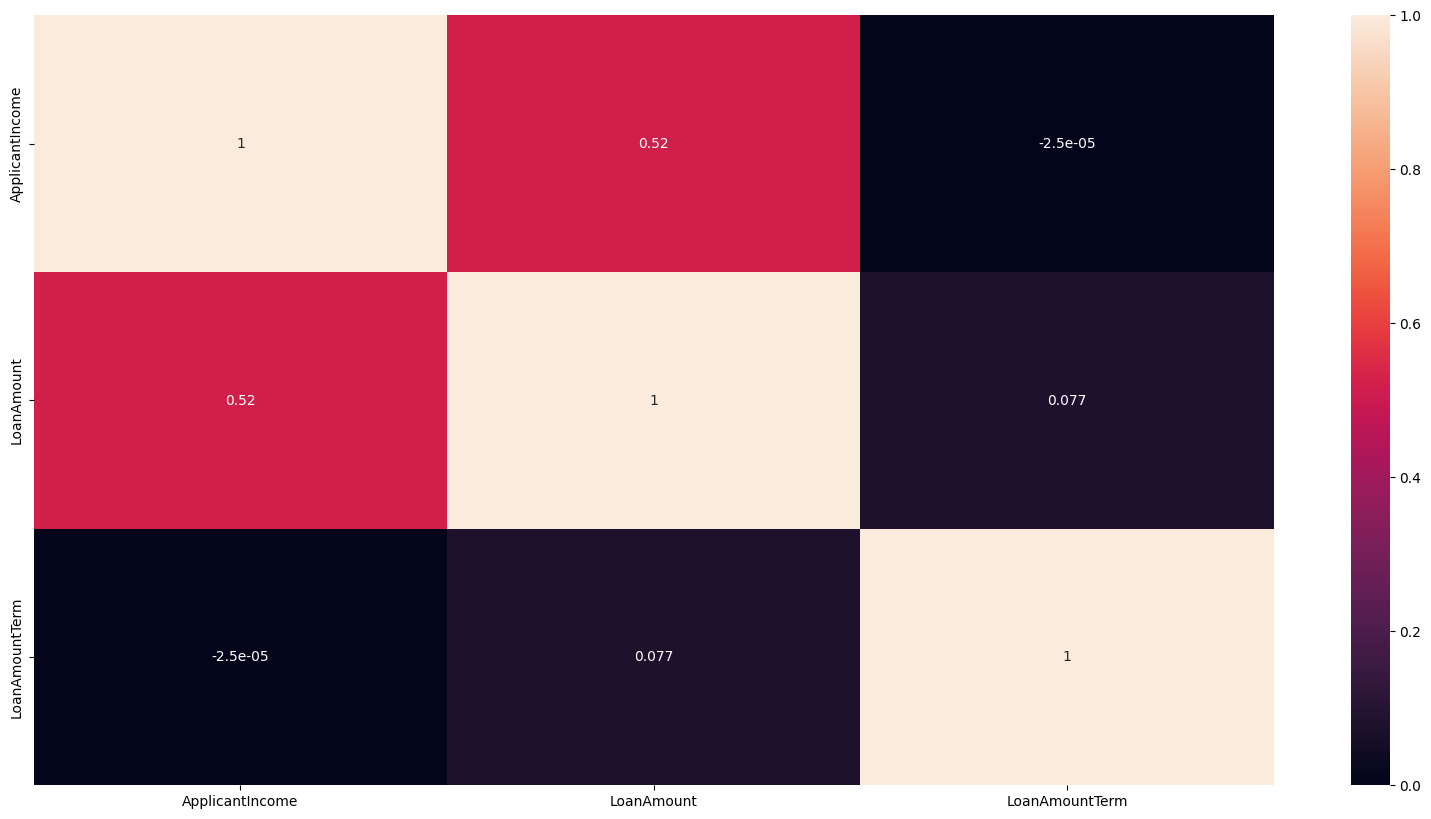

In [9]:
plt.rcParams['figure.figsize'] = (20, 10)

sns.heatmap(dataset.dropna().corr(numeric_only=True), annot=True)

plt.show()
plt.rcdefaults()

Visualize in pairplots the correlation between important metrics in the dataset,
divided by the `churn`, to see if there is a clear difference between the two classes.

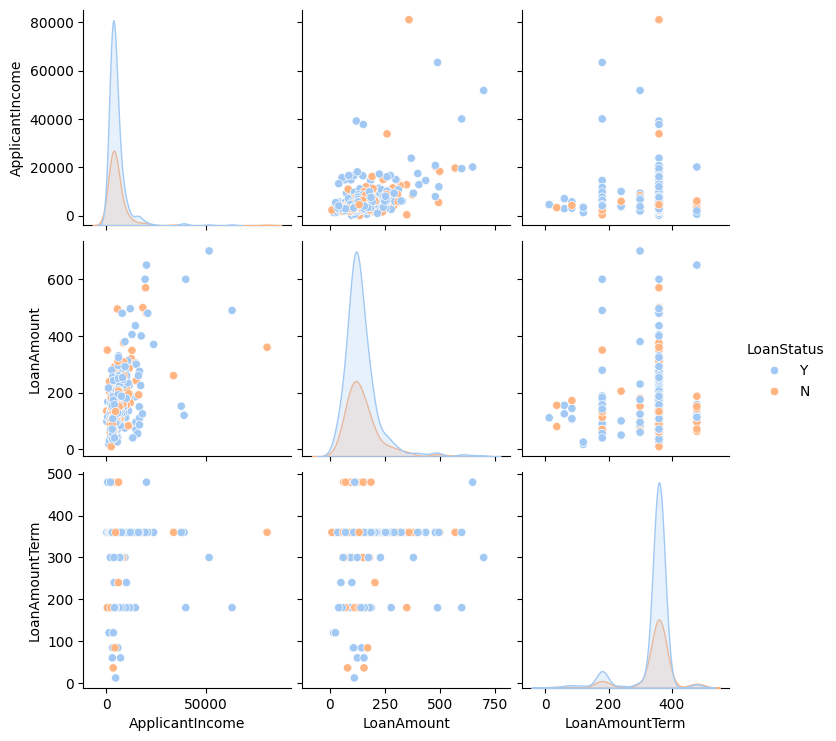

In [10]:
sns.pairplot(dataset, vars=['ApplicantIncome', 'LoanAmount', 'LoanAmountTerm'], hue='LoanStatus', palette='pastel')
plt.show()

Check if the dataset is balanced or not.

<Axes: xlabel='LoanStatus'>

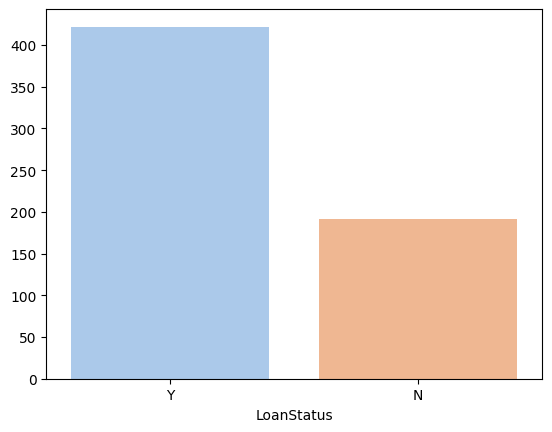

In [11]:
xx = dataset['LoanStatus'].value_counts()
sns.barplot(x=xx.index, y=xx.values, hue=xx.index, palette='pastel')

In this case, the dataset is not balanced, so we will have to take this into account when
preprocessing the data.

## Basic Data Preparation

Firstly we remove the `Loan_ID` column, as it is not relevant for the classification model.

In [12]:
input_dataset = dataset.drop(['Loan_ID'], axis=1).dropna()
loan_status = input_dataset['LoanStatus']
input_dataset = input_dataset.drop(['LoanStatus'], axis=1)
input_dataset

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,PropertyArea
1,Male,Yes,1,Graduate,No,4583,1508,128.00,360.00,Rural
2,Male,Yes,0,Graduate,Yes,3000,0,66.00,360.00,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358,120.00,360.00,Urban
4,Male,No,0,Graduate,No,6000,0,141.00,360.00,Urban
5,Male,Yes,2,Graduate,Yes,5417,4196,267.00,360.00,Urban
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0,71.00,360.00,Rural
610,Male,Yes,3+,Graduate,No,4106,0,40.00,180.00,Rural
611,Male,Yes,1,Graduate,No,8072,240,253.00,360.00,Urban
612,Male,Yes,2,Graduate,No,7583,0,187.00,360.00,Urban


Next we create a pipeline to preprocess the data, which includes:
  - `OneHotEncoder` for the categorical columns

After defining the pipeline, we `fit` it to the dataset and transform the data.

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# num_attributes = no_loan_status_dataset.select_dtypes(include=["int64", "float64"]).columns.to_numpy()
cat_attributes = input_dataset.select_dtypes(include=['object']).columns.to_numpy()
print(cat_attributes)

basic_pipeline = ColumnTransformer(
    [   
        ("text", OneHotEncoder(sparse_output=False), cat_attributes),
    ]
)

basic_pipeline.set_output(transform='pandas')
preprocessed_dataset = basic_pipeline.fit_transform(input_dataset)
preprocessed_dataset.info()


['Gender' 'Married' 'Dependents' 'Education' 'SelfEmployed'
 'CoapplicantIncome' 'PropertyArea']
<class 'pandas.core.frame.DataFrame'>
Index: 523 entries, 1 to 613
Columns: 270 entries, text__Gender_Female to text__PropertyArea_Urban
dtypes: float64(270)
memory usage: 1.1 MB


After preprocessing the data, we split the dataset into training and testing sets.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    preprocessed_dataset, loan_status, test_size=0.3, random_state=42
)

## Train classifier

In this section we will train different classifiers to predict the `LoanStatus` of the customers.
And we will evaluate the performance of each classifier to choose the best one.

### Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
decision_tree_classifier.fit(X_train, y_train)

tree_score = decision_tree_classifier.score(X_test, y_test)
y_pred = decision_tree_classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

Accuracy: 0.6496815286624203
Precision: 0.5837945676843107
Recall: 0.6496815286624203
F1 Score: 0.5680379528894609


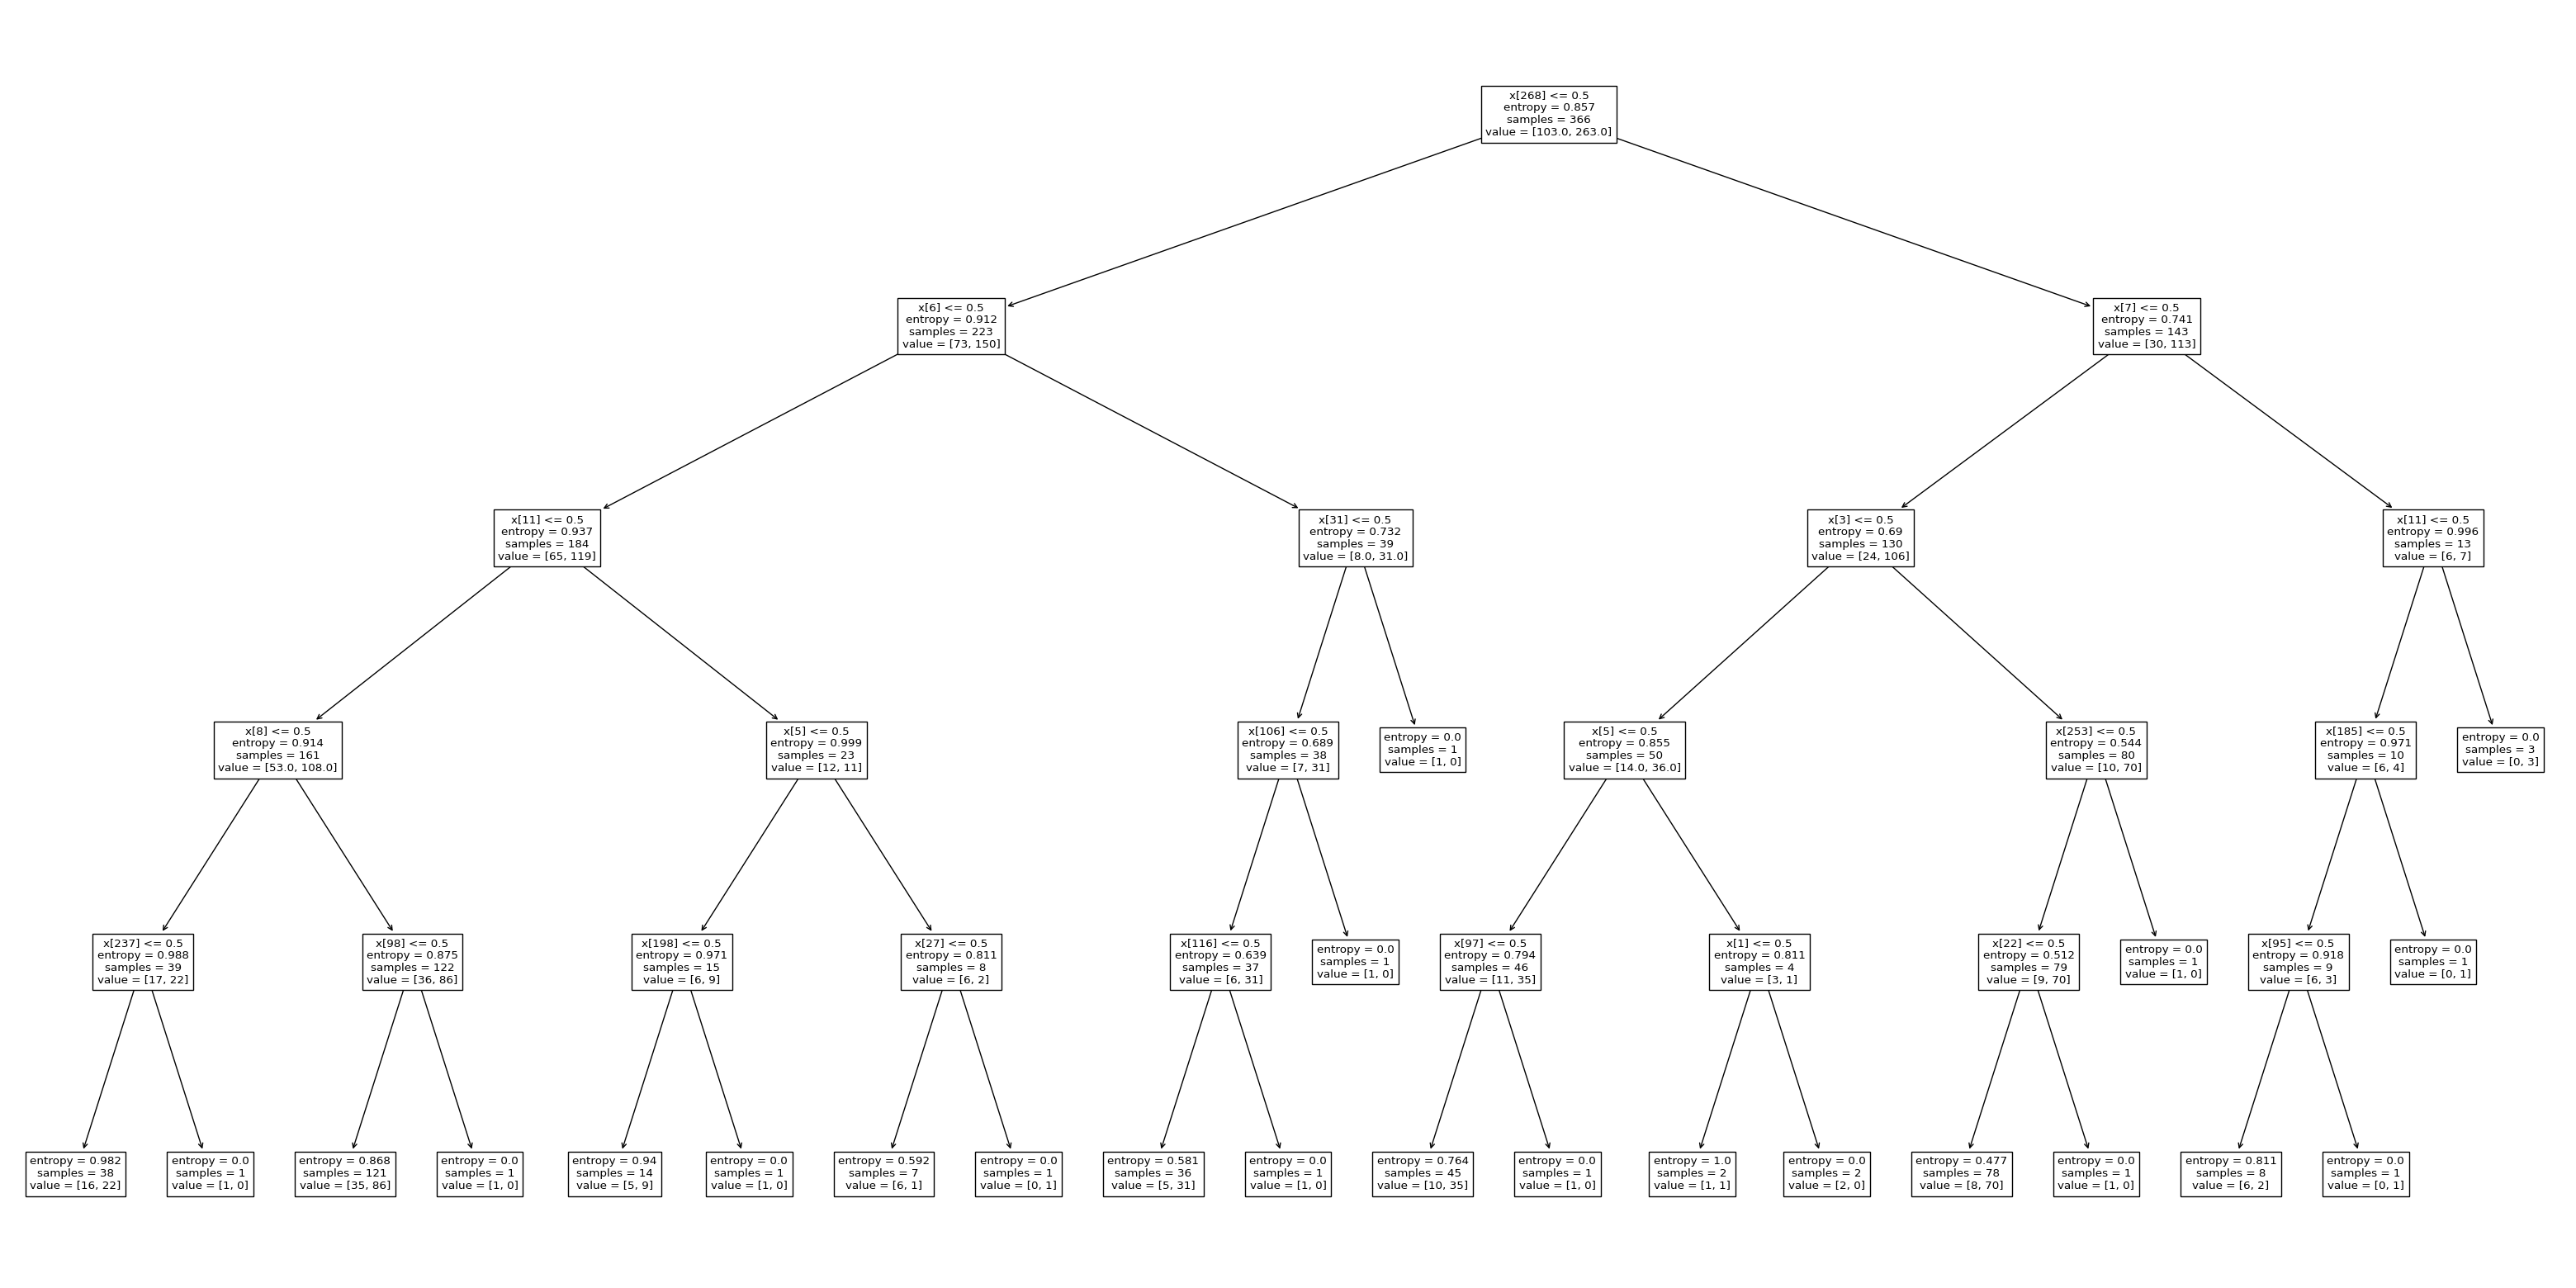

In [16]:
from sklearn import tree

plt.rcParams['figure.figsize'] = (40, 20)
tree.plot_tree(decision_tree_classifier)
plt.show()

plt.rcdefaults()

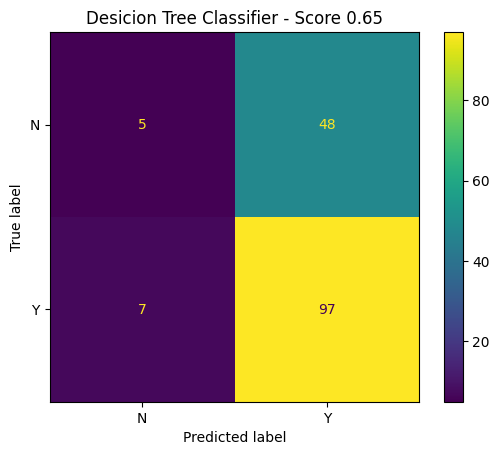

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

confusion_matrix_result = confusion_matrix(y_test, decision_tree_classifier.predict(X_test))
cm_display = ConfusionMatrixDisplay(
    confusion_matrix_result, display_labels=decision_tree_classifier.classes_
).plot()

plt.title(f"Desicion Tree Classifier - Score {tree_score:.2f}")
plt.show()


### SVC

Create the `SVC` classifier, and `fit` it to the training data.

In [31]:
from sklearn.svm import SVC

classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

Accuracy: 0.6624203821656051
Precision: 0.4388007627084263
Recall: 0.6624203821656051
F1 Score: 0.527905898430827


/home/hadronomy/.cache/pypoetry/virtualenvs/solo-tid-project-vuAzzaOA-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Create and plot the confusion matrix of the `SVC` classifier.

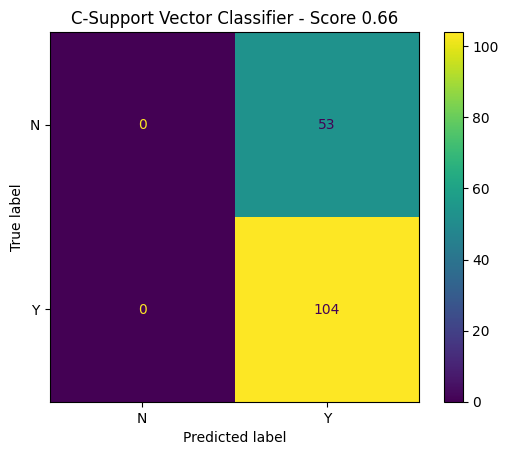

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

confusion_matrix_result = confusion_matrix(y_test, classifier.predict(X_test))
cm_display = ConfusionMatrixDisplay(
    confusion_matrix_result, display_labels=classifier.classes_
).plot()

plt.title(f"C-Support Vector Classifier - Score {score:.2f}")
plt.show()


Here we can see that the `SVC` classifier has a high accuracy and a score of `0.66`, which is a good result.

#### Export the model

In [20]:
import skops.io as skio

skio.dump(classifier, "classifier.skops")
skio.dump(basic_pipeline, "pipeline.skops")

#### Import the model

In [21]:
import skops.io as skio

classifier = skio.load("classifier.skops")
basic_pipeline = skio.load("pipeline.skops")